### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [ ]:
data = pd.read_csv('data/coupons.csv')

In [ ]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [ ]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

From this we can find which columns have null values by subtracting the total amount of rows by the non-null count for each column

Here we see that the columns car, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, and Restaurant20To50 have null values.

To get the number of null columns we sumbtract the number of non-null rows from the total number of rows.

Using this we get:

* 12576 rows for car
* 107 rows for Bar
* 217 rows for CoffeeHouse
* 151 rows for CarryAway
* 130 rows for RestaurantLessThan20
* 189 rows for Restaurant20To50

3. Decide what to do about your missing data -- drop, replace, other...

Car Column

In [ ]:
data.car.value_counts(dropna=False)

car
NaN                                         12576
Scooter and motorcycle                         22
Mazda5                                         22
do not drive                                   22
crossover                                      21
Car that is too old to install Onstar :D       21
Name: count, dtype: int64

we cant extrapolate what the na values should be from this data so we will drop the column

In [ ]:
data.drop(columns='car', inplace=True)

In [ ]:
cols = ['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']

for col in cols:
    data.loc[data[col] == 'less1', col] = 'never'
    print('{:20} : {}'.format(col, data[col].value_counts()['never']))

Bar                  : 8679
CoffeeHouse          : 6347
CarryAway            : 2009
RestaurantLessThan20 : 2313
Restaurant20To50     : 8213


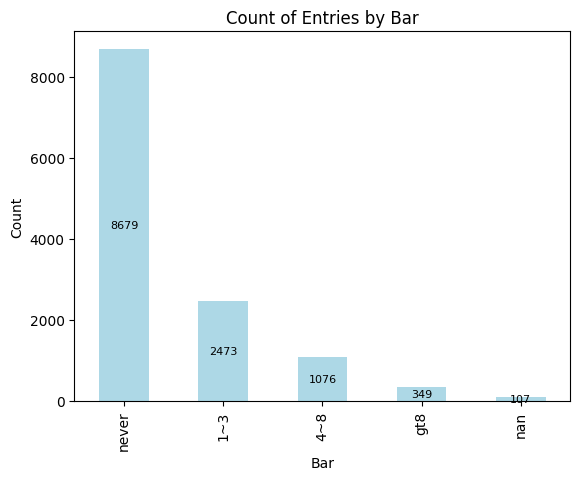

In [ ]:
Bar_counts = data['Bar'].value_counts(dropna=False)
order = ['never', '1~3', '4~8','gt8', np.nan]

ax = Bar_counts.loc[order].plot(kind='bar', color='lightblue')
ax.bar_label(ax.containers[0], label_type='center', fontsize=8)
plt.title('Count of Entries by Bar')
plt.xlabel('Bar')
plt.ylabel('Count')

plt.show()

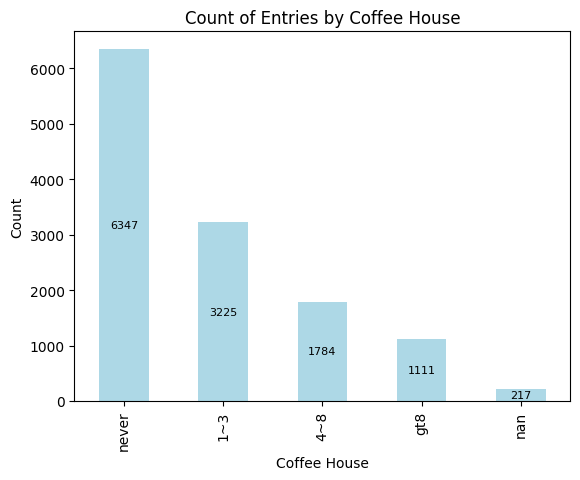

In [18]:
CoffeeHouse_counts = data['CoffeeHouse'].value_counts(dropna=False)
ax = CoffeeHouse_counts.loc[order].plot(kind='bar', color='lightblue')
ax.bar_label(ax.containers[0], label_type='center', fontsize=8) #to include value inside the bar

plt.title('Count of Entries by Coffee House')
plt.xlabel('Coffee House')
plt.ylabel('Count')

plt.show()

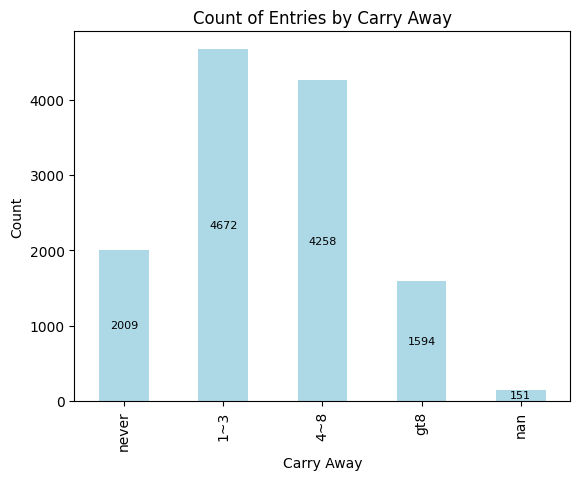

In [19]:
CarryAway_counts = data['CarryAway'].value_counts(dropna=False)

ax = CarryAway_counts.loc[order].plot(kind='bar',color='lightblue')
ax.bar_label(ax.containers[0], label_type='center', fontsize=8)
plt.title('Count of Entries by Carry Away')
plt.xlabel('Carry Away')
plt.ylabel('Count')

plt.show()

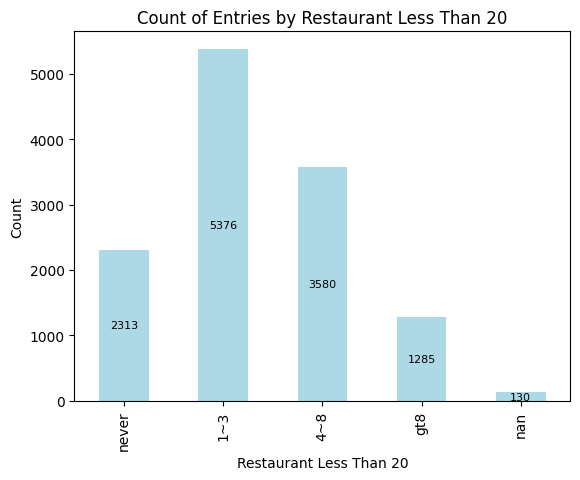

In [20]:
Rest_LT20_counts = data['RestaurantLessThan20'].value_counts(dropna=False)

ax = Rest_LT20_counts.loc[order].plot(kind='bar',color='lightblue')
ax.bar_label(ax.containers[0], label_type='center', fontsize=8)
plt.title('Count of Entries by Restaurant Less Than 20')
plt.xlabel('Restaurant Less Than 20')
plt.ylabel('Count')

plt.show()

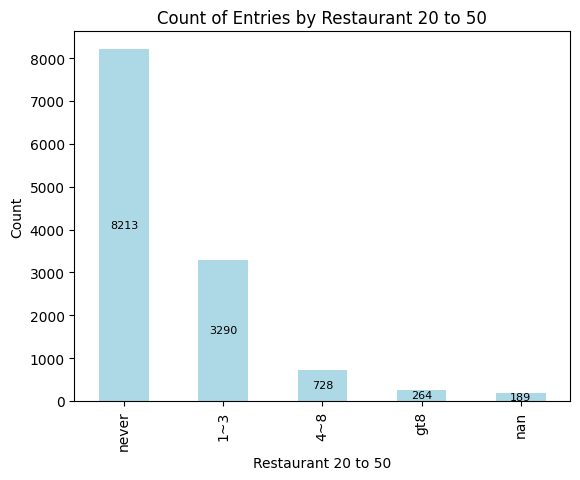

In [21]:
Rest_20_50_counts = data['Restaurant20To50'].value_counts(dropna=False)

ax = Rest_20_50_counts.loc[order].plot(kind='bar', color='lightblue')
ax.bar_label(ax.containers[0], label_type='center', fontsize=8)
plt.title('Count of Entries by Restaurant 20 to 50')
plt.xlabel('Restaurant 20 to 50')
plt.ylabel('Count')

plt.show()

Since the missing values are low volume and the graphs show that each category contains mostly one value we can replace the nulls with that value

In [22]:
cols = ['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']

for col in cols:
    data[col] = data[col].fillna(data[col].mode()[0])

In [23]:
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

No more nulls

4. What proportion of the total observations chose to accept the coupon?



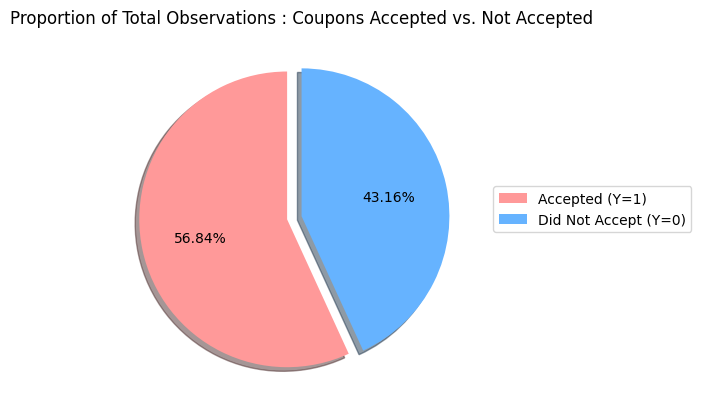

In [24]:
acceptance_counts = data.Y.value_counts()
accept_labels = ['Accepted (Y=1)', 'Did Not Accept (Y=0)']
colors = ['#ff9999','#66b3ff']

fig, ax = plt.subplots()

ax = acceptance_counts.plot(kind='pie', title='Proportion of Total Observations : Coupons Accepted vs. Not Accepted', y='Y', shadow = True, labeldistance=None, autopct='%2.2f%%', colors=colors, explode=[0.1,0], startangle=90, xlabel = '', ylabel = '', label = True, labels = accept_labels)
ax.legend(bbox_to_anchor=(1, 0.6), loc='best') # to position the legend
plt.show()

5. Use a bar plot to visualize the `coupon` column.

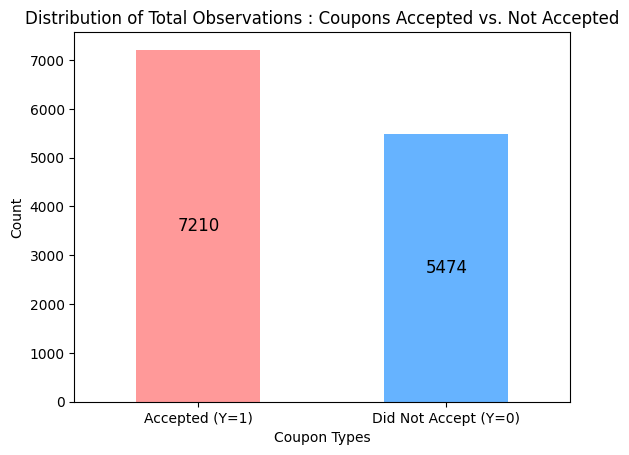

In [25]:
acceptance_counts = data.Y.value_counts()
accept_labels = ['Accepted (Y=1)', 'Did Not Accept (Y=0)']
colors = ['#ff9999','#66b3ff']

fig, ax = plt.subplots()

ax = acceptance_counts.plot(kind='bar', title='Distribution of Total Observations : Coupons Accepted vs. Not Accepted', y='Y', color=colors, xlabel = 'Coupon Types', ylabel = 'Count')

ax.set_xticklabels(accept_labels,rotation=0) #to set the label values and rotation to 0 degree
ax.bar_label(ax.containers[0], label_type='center', fontsize=12) #to include value inside the bar

# since we don't need to have legends, removing the ax.legend line
#ax.legend(bbox_to_anchor=(1, 1), loc='best') # to position the legend

plt.show()

6. Use a histogram to visualize the temperature column.

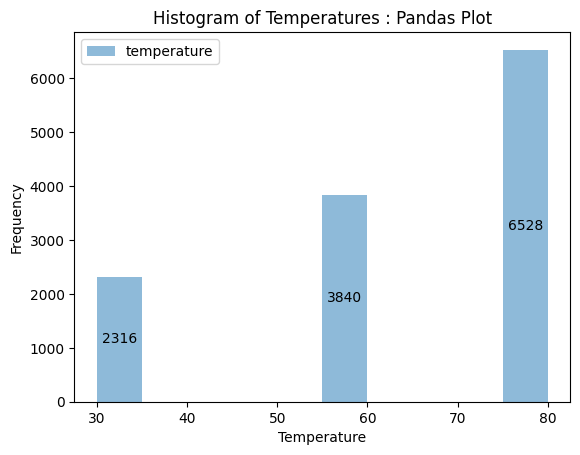

In [27]:
ax = data.plot(kind='hist', title='Histogram of Temperatures : Pandas Plot', y='temperature', alpha=0.5)

ax.set_xlabel('Temperature')
ax.set_ylabel("Frequency")

ax.bar_label(ax.containers[0], fmt=lambda x: int(x) if x > 0 else '', label_type='center', fontsize=10)

plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [28]:
df_bar = data.query('coupon == "Bar"')
df_bar.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,never,4~8,4~8,never,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,never,4~8,4~8,never,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


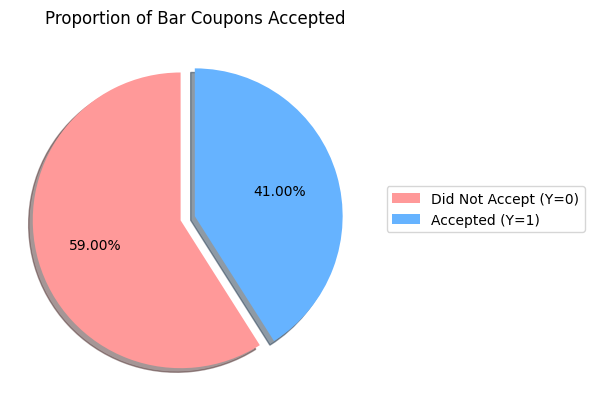

In [29]:
coupon_map = {0:'Did Not Accept (Y=0)', 1:'Accepted (Y=1)'}

bar_acceptance = df_bar.Y.value_counts()
bar_coupon_index = bar_acceptance.index.tolist()

accept_labels = list(map(coupon_map.get, bar_coupon_index))
colors = ['#ff9999','#66b3ff']

fig, ax = plt.subplots()

ax = bar_acceptance.plot(kind='pie', title='Proportion of Bar Coupons Accepted', y='Y', shadow = True, labeldistance=None, autopct='%2.2f%%', colors=colors, explode=[0.1,0], startangle=90, xlabel = '', ylabel = '', label = True, labels = accept_labels)
ax.legend(bbox_to_anchor=(1, 0.6), loc='best')
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [30]:
bar_3_or_less = ['never', '1~3']


df_bar1 = df_bar.query('Bar in @bar_3_or_less')
bar_rate1 = df_bar1.query('Y == 1')['Y'].count()/df_bar1['Y'].count()
bar_rate1 = bar_rate1 * 100

df_bar2 = df_bar.query('Bar not in @bar_3_or_less')
bar_rate2 = df_bar2.query('Y == 1')['Y'].count()/df_bar2['Y'].count()
bar_rate2 = bar_rate2 * 100

print ('The acceptance rate of customers that went to a bar:')
print ('three or fewer times a month is  {:.2f}%'.format(bar_rate1))
print ('more than three times a month is {:.2f}%'.format(bar_rate2))

The acceptance rate of customers that went to a bar:
three or fewer times a month is  37.07%
more than three times a month is 76.88%


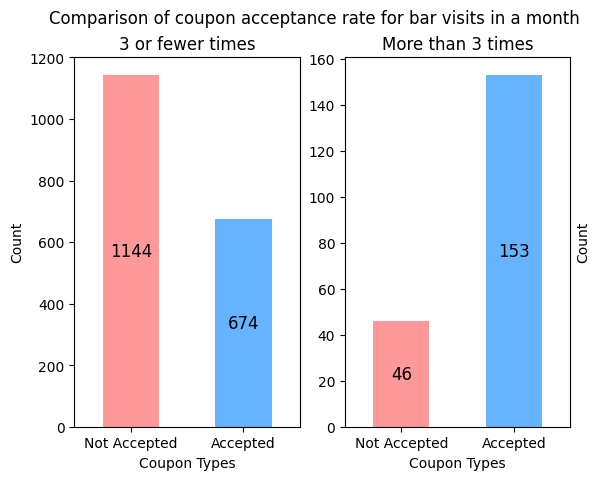

In [31]:
coupon_map = {0:'Not Accepted', 1:'Accepted'}

bar1    = df_bar1.Y.value_counts().sort_index()
bar_ci1 = bar1.index.tolist()

accept_labels1 = list(map(coupon_map.get, bar_ci1))

bar2    = df_bar2.Y.value_counts().sort_index()
bar_ci2 = bar2.index.tolist()

accept_labels2 = list(map(coupon_map.get, bar_ci2))
fig, axes = plt.subplots(nrows=1, ncols=2)

bar1.plot(kind='bar', ax=axes[0], title='3 or fewer times', y='Y', color=colors, xlabel = 'Coupon Types', ylabel = 'Count')
axes[0].set_xticklabels(accept_labels1,rotation=0)
axes[0].bar_label(axes[0].containers[0],label_type='center', fontsize=12)

bar2.plot(kind='bar', ax=axes[1], title='More than 3 times', y='Y', color=colors, xlabel = 'Coupon Types', ylabel = 'Count')
axes[1].set_xticklabels(accept_labels2,rotation=0)
axes[1].bar_label(axes[1].containers[0], label_type='center', fontsize=12)
axes[1].yaxis.set_label_position("right")

plt.suptitle('Comparison of coupon acceptance rate for bar visits in a month')

plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [32]:
bar_1_or_more = ['1~3', 'gt8', '4~8']
age_25_or_older = ['26', '31', '36', '41', '46', '50plus']
df_bar_age1 = df_bar.query('Bar in @bar_1_or_more and age in @age_25_or_older')
df_bar_age2 = pd.merge(df_bar, df_bar_age1, how='outer', indicator=True)
df_bar_age2 = df_bar_age2[df_bar_age2._merge == 'left_only'].drop('_merge', axis=1)

print('Total of all rows in df_bar dataframe is      {}'.format(df_bar.shape[0]))
print('Total of all rows bar=1 or more + age > 25 is {}'.format(df_bar_age1.shape[0]))
print('Total of all rows for all others           is {}'.format(df_bar_age2.shape[0]))

Total of all rows in df_bar dataframe is      2017
Total of all rows bar=1 or more + age > 25 is 420
Total of all rows for all others           is 1597


In [33]:
bar_age1 = df_bar_age1.query('Y == 1')['Y'].count()/df_bar_age1['Y'].count()

bar_age1 = bar_age1 * 100
bar_age2 = df_bar_age2.query('Y == 1')['Y'].count()/df_bar_age2['Y'].count()
bar_age2 = bar_age2 * 100

print ('The acceptance rate of customers that meet these criteria:')
print ('go to bar at least once a month and over 25 years of age is {:.2f}%'.format(bar_age1))
print ('all others is {:.2f}%'.format(bar_age2))

The acceptance rate of customers that meet these criteria:
go to bar at least once a month and over 25 years of age is 69.52%
all others is 33.50%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [34]:
bar_1_or_more = ['1~3', 'gt8', '4~8']
pass_not_kid  = ['Friend(s)', 'Partner']
occu_farm     = ['Farming Fishing & Forestry']
df_bar_5_1  = df_bar.query('Bar in @bar_1_or_more and passanger in @pass_not_kid and occupation not in @occu_farm')
df_bar_5_2 = pd.merge(df_bar, df_bar_5_1, how='outer', indicator=True)
df_bar_5_2 = df_bar_5_2[df_bar_5_2._merge == 'left_only'].drop('_merge', axis=1)

print('Total of all rows in df_bar dataframe is                                         {}'.format(df_bar.shape[0]))
print('Total of all rows bar=1 or more + passenger not kids + not farm/fish/forestry is {}'.format(df_bar_5_1.shape[0]))
print('Total of all rows for all others is                                              {}'.format(df_bar_5_2.shape[0]))

Total of all rows in df_bar dataframe is                                         2017
Total of all rows bar=1 or more + passenger not kids + not farm/fish/forestry is 195
Total of all rows for all others is                                              1822


In [35]:
bar_5_1 = df_bar_5_1.query('Y == 1')['Y'].count()/df_bar_5_1['Y'].count()

bar_5_1 = bar_5_1 * 100
bar_5_2 = df_bar_5_2.query('Y == 1')['Y'].count()/df_bar_5_2['Y'].count()
bar_5_2 = bar_5_2 * 100

print ('The acceptance rate of customers that meet these criteria:')
print ('go to bar at more than a month and passenger not a kid and occupation not farming {:.2f}%'.format(bar_5_1))
print ('all others is {:.2f}%'.format(bar_5_2))

The acceptance rate of customers that meet these criteria:
go to bar at more than a month and passenger not a kid and occupation not farming 71.79%
all others is 37.71%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [36]:
bar_1_or_more = ['1~3', 'gt8', '4~8']

pass_not_kid  = ['Friend(s)', 'Partner']
not_widowed   = ['Unmarried partner','Single','Married partner','Divorced' ]
age_lt_30     = ['below21', '21', '26']
cheap_4_times = ['4~8', 'gt8']
income_lt_50  = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']
df_data_6_1  = data.query('(Bar in @bar_1_or_more and passanger in @pass_not_kid and maritalStatus in @not_widowed) | \
                          (Bar in @bar_1_or_more and age in @age_lt_30) | \
                          (RestaurantLessThan20 in @cheap_4_times and income in @income_lt_50)')

df_data_6_2 = pd.merge(data, df_data_6_1, how='outer', indicator=True)
df_data_6_2 = df_data_6_2[df_data_6_2._merge == 'left_only'].drop('_merge', axis=1)

print('Total of all rows in df_bar dataframe is   {}'.format(data.shape[0]))
print('Total of all rows that meet criteria #6 is {}'.format(df_data_6_1.shape[0]))
print('Total of all rows for all others is        {}'.format(df_data_6_2.shape[0]))

Total of all rows in df_bar dataframe is   12684
Total of all rows that meet criteria #6 is 4405
Total of all rows for all others is        8279


In [37]:
data_6_1 = df_data_6_1.query('Y == 1')['Y'].count()/df_data_6_1['Y'].count()
data_6_1 = data_6_1 * 100
data_6_2 = df_data_6_2.query('Y == 1')['Y'].count()/df_data_6_2['Y'].count()
data_6_2 = data_6_2 * 100

print ('The acceptance rate of customers that meet these criteria:')
print ('  outlined in question #6 : {:.2f}%'.format(data_6_1))

The acceptance rate of customers that meet these criteria:
  outlined in question #6 : 61.32%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [38]:
print ('Went to bar 3 or fewer times         : {:.2f}'.format(bar_rate1))
print ('Went to bar more than 3 times        : {:.2f}'.format(bar_rate2))
print ('Went to bar 1+ and above 25 yrs      : {:.2f}'.format(bar_age1))
print ('Bar less than 1 or age below 25 yrs  : {:.2f}'.format(bar_age2))
print ('Went to bar 1+ and other conditions  : {:.2f}'.format(bar_5_1))
print ('Bar less than 1 or other condition#5 : {:.2f}'.format(bar_5_2))
print ('Bar more than 1 or other condition#6 : {:.2f}'.format(data_6_1))
print ('Bar less than 1 or other condition#6 : {:.2f}'.format(data_6_2))

Went to bar 3 or fewer times         : 37.07
Went to bar more than 3 times        : 76.88
Went to bar 1+ and above 25 yrs      : 69.52
Bar less than 1 or age below 25 yrs  : 33.50
Went to bar 1+ and other conditions  : 71.79
Bar less than 1 or other condition#5 : 37.71
Bar more than 1 or other condition#6 : 61.32
Bar less than 1 or other condition#6 : 54.46


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [40]:
df_coffee = data.query('coupon == "Coffee House"')
coffee_1_or_more = ['1~3', '4~8', 'gt8']
age_lt_30     = ['below21', '21', '26']
pass_not_kid  = ['Friend(s)', 'Partner']

df_data_7_11  = df_coffee.query('CoffeeHouse in @coffee_1_or_more')
df_data_7_12 = pd.merge(df_coffee, df_data_7_11, how='outer', indicator=True)
df_data_7_12 = df_data_7_12[df_data_7_12._merge == 'left_only'].drop('_merge', axis=1)

data_7_11 = df_data_7_11.query('Y == 1')['Y'].count()/df_data_7_11['Y'].count()
data_7_11 = data_7_11 * 100
data_7_12 = df_data_7_12.query('Y == 1')['Y'].count()/df_data_7_12['Y'].count()
data_7_12 = data_7_12 * 100

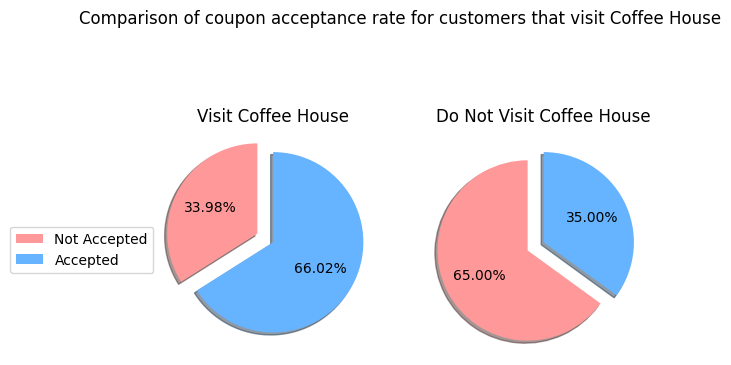

In [43]:
coupon_map = {0:'Not Accepted', 1:'Accepted'}

data711    = df_data_7_11.Y.value_counts().sort_index()
data71_ci1 = data711.index.tolist()
d711_accept_labels = list(map(coupon_map.get, data71_ci1))

data712    = df_data_7_12.Y.value_counts().sort_index()
data71_ci2 = data712.index.tolist()
d712_accept_labels = list(map(coupon_map.get, data71_ci2))

fig, axes = plt.subplots(nrows=1, ncols=2)

data711.plot(kind='pie', ax=axes[0], title='Visit Coffee House', y='Y', shadow = True, labeldistance=None, autopct='%2.2f%%', colors=colors, explode=[0.2,0], startangle=90, xlabel = '', ylabel = '', label = True, labels = d711_accept_labels)
data712.plot(kind='pie', ax=axes[1], title='Do Not Visit Coffee House', y='Y', shadow = True, labeldistance=None, autopct='%2.2f%%', colors=colors, explode=[0.2,0], startangle=90, xlabel = '', ylabel = '', label = True, labels = d712_accept_labels)

axes[0].legend(bbox_to_anchor=(0, 0.6), loc='best')

plt.suptitle('Comparison of coupon acceptance rate for customers that visit Coffee House')

plt.show()